<a href="https://colab.research.google.com/github/alphavergopi/flask_apps/blob/master/FaceMaskDetector_yolov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

fatal: destination path 'darknet' already exists and is not an empty directory.


In [3]:
%cd darknet

/content/drive/My Drive/darknet


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

print("Building. . . It might take 2-3 minutes")

!make &> build_log.txt

Building. . . It might take 2-3 minutes


In [ ]:
!wget "https://www.dropbox.com/s/6gewe947ake1g95/kaggle_and_no-mask_dataset.zip?dl=1" -O kaggle_and_no-mask_dataset.zip
!unzip kaggle_and_no-mask_dataset.zip -d no-mask_dataset

In [ ]:
import random
import os
import subprocess
import sys

image_dir = "./no-mask_dataset"
f_val = open("no-mask_data_test.txt", 'w')
f_train = open("no-mask_data_train.txt", 'w')

path, dirs, files = next(os.walk(image_dir))
data_size = len(files)

ind = 0
data_test_size = int(0.2 * data_size)
test_array = random.sample(range(data_size), k=data_test_size)

for f in os.listdir(image_dir):
    if(f.split(".")[-1] == "jpg"):
        ind += 1
        
        if ind in test_array:
            f_val.write(image_dir+'/'+f+'\n')
        else:
            f_train.write(image_dir+'/'+f+'\n')

f_train.close()
f_val.close()

In [ ]:
#!wget "https://www.dropbox.com/sh/jfyj1wetf28bgpr/AACGJHIlPyKRO70B9DlAVqWPa?dl=1" -O yolov3-ambulance-code.zip
#!unzip yolov3-ambulance-code.zip

In [ ]:
!wget "https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1" -O darknet53.conv.74

In [4]:
!chmod +x darknet

In [18]:
!./darknet detector train yolov3-no-mask-setup.data yolov3-no-mask-train.cfg ./darknet53.conv.74 -dont_show -clear -map 2> train_log.txt

Streaming output truncated to the last 5000 lines.

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 3.40 %, best = 3.40 % 
 132: 3.482324, 4.409604 avg loss, 0.000100 rate, 4.452657 seconds, 8448 images, 2.418683 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 3.40 %, best = 3.40 % 
 133: 4.934168, 4.462060 avg loss, 0.000100 rate, 4.671645 seconds, 8512 images, 2.405232 hours left
Loaded: 0.000041 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 3.40 %, best = 3.40 % 
 134: 3.267212, 4.342575 avg loss, 0.000100 rate, 4.689504 seconds, 8576 images, 2.392431 hours left
Loaded: 0.000056 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 3.40 %, best = 3.40 % 
 135: 3.486047, 4.256922 avg loss, 0.000100 rate, 4.596876 seconds, 8640 images, 2.379787 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 3.40 %, 

In [ ]:
!tail train_log.txt

In [ ]:
!wget "https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1" -O test2.jpg

In [7]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 57 K-images (0 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test1.jpg: Predicted in 45.933000 milli-seconds.
Mask: 94%


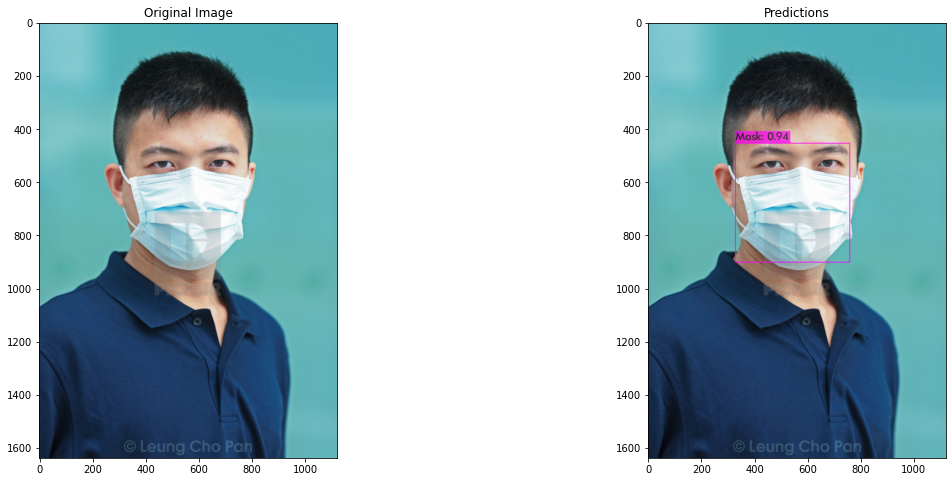

In [8]:
!./darknet detector test yolov3-no-mask-setup.data yolov3-no-mask-test.cfg backup/yolov3-no-mask-train_best.weights test1.jpg -thresh .6 2> /dev/null
display_output("test1.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 57 K-images (0 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test2.jpg: Predicted in 45.859000 milli-seconds.
Mask: 75%
Mask: 95%
No-Mask: 100%
Mask: 81%


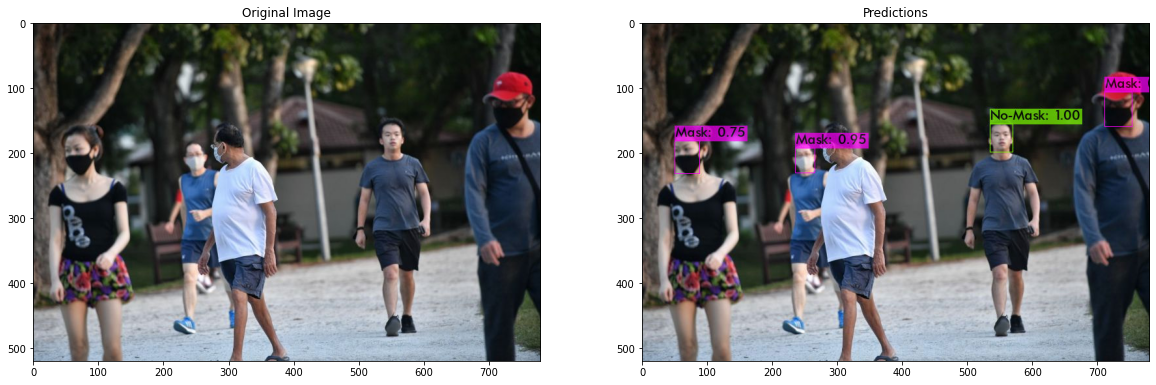

In [9]:
!./darknet detector test yolov3-no-mask-setup.data yolov3-no-mask-test.cfg backup/yolov3-no-mask-train_best.weights test2.jpg -thresh .6 2> /dev/null
display_output("test2.jpg")

--2020-08-22 11:30:07--  https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/g905k4r1git5kbx/test-image3.jpg [following]
--2020-08-22 11:30:07--  https://www.dropbox.com/s/dl/g905k4r1git5kbx/test-image3.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5c0cb66d1ced658578b59b46ca.dl.dropboxusercontent.com/cd/0/get/A96vVnhzyYaaFvmSLRxkZapHkuSZjfcX5Mdyi-Od56i0yzpOlElLx_fjWtbX85qP8EgslHhE9XdI52_HgJakkeOHkp3NRP71hEL70ZhG6Q1cqaXBXYsLxhCsR0xexh8CZl4/file?dl=1# [following]
--2020-08-22 11:30:07--  https://uc5c0cb66d1ced658578b59b46ca.dl.dropboxusercontent.com/cd/0/get/A96vVnhzyYaaFvmSLRxkZapHkuSZjfcX5Mdyi-Od56i0yzpOlElLx_fjWtbX85qP8EgslHhE9XdI52_HgJakkeOHkp3NRP71hEL70Zh

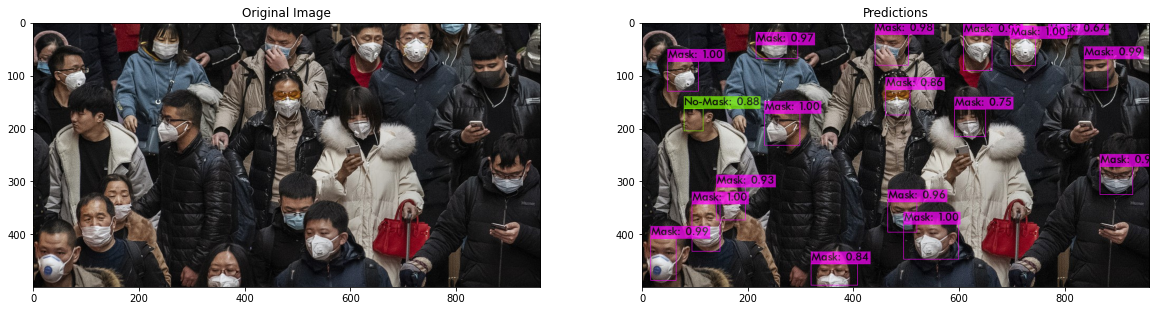

In [14]:
!wget "https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1" -O test3.jpg
!./darknet detector test yolov3-no-mask-setup.data yolov3-no-mask-test.cfg backup/yolov3-no-mask-train_best.weights test3.jpg -thresh .6 2> /dev/null
display_output("test3.jpg")

--2020-08-22 11:30:51--  https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/90ggmiur7b8g35m/test-image4.jpg [following]
--2020-08-22 11:30:51--  https://www.dropbox.com/s/dl/90ggmiur7b8g35m/test-image4.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5593d0288098aa8b2246849222.dl.dropboxusercontent.com/cd/0/get/A94b3pqv8z45g3IrHqtX4h4UfLfQNvO76I1tyLXdhQHMEvjnL3DLXpmtu0TrFKau-RK9uuxaFTEv8f5h1683crAbxsLLShlhVJS7HuqlG0UErqIvqlztHiqnI3g-ckawmAk/file?dl=1# [following]
--2020-08-22 11:30:51--  https://uc5593d0288098aa8b2246849222.dl.dropboxusercontent.com/cd/0/get/A94b3pqv8z45g3IrHqtX4h4UfLfQNvO76I1tyLXdhQHMEvjnL3DLXpmtu0TrFKau-RK9uuxaFTEv8f5h1683crAbxsLLShlhVJS7Huq

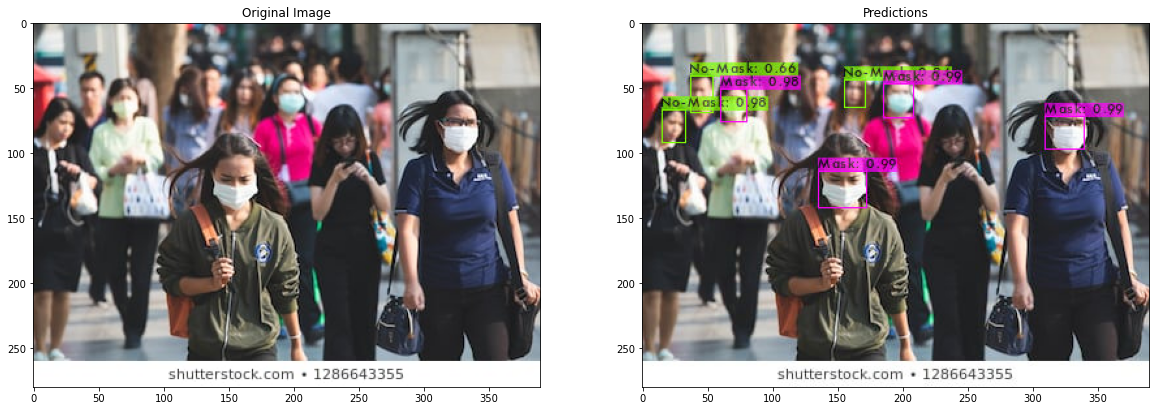

In [15]:
!wget "https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1" -O test4.jpg
!./darknet detector test yolov3-no-mask-setup.data yolov3-no-mask-test.cfg backup/yolov3-no-mask-train_best.weights test4.jpg -thresh .6 2> /dev/null
display_output("test4.jpg")